
Na lista constam apenas os municípios que receberão alguma academia conforme indicações dos Deputados, mas os lotes deverão considerar os demais municípios, considerando que pode haver alteração de indicações e que a proposta é utilizar o processo licitatório para indicações de anos seguintes.

Como o Antônio colocou no e-mail anterior, os 5 lotes deverão ser distribuídos com quantidades similares de academias (informação que a Luana irá nos enviar) e agrupando os municípios próximos (incluindo aqueles não indicados na lista).



In [1]:
!pip install geopandas


     |████████████████████████████████| 962kB 2.9MB/s 
     |████████████████████████████████| 10.9MB 9.9MB/s 
     |████████████████████████████████| 14.7MB 309kB/s 


In [2]:
!pip install pyshp

     |████████████████████████████████| 225kB 2.8MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=e395648bf64d9db00a16a794b8ed5abb58d06d29e051114508b6290bd1681f7a
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built pyshp


In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import shapefile as shp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
bd = pd.read_excel('/content/drive/My Drive/Tabelas Finais CAMG /Academias/regionalizacao academias 2020 2.xlsx', header = 2)
bd = bd.drop([193, 194])

bd['Municípios'] = bd['Municípios'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
bd['Municípios'] = bd['Municípios'].str.strip()
bd['Municípios'] = bd['Municípios'].str.replace('PREFEITURA DE','', regex = True)
# bd['Municípios'] = bd['Municípios'].str.replace('CODISBURGO', 'CORDISBURGO', regex = True)
# bd['Municípios'] = bd['Municípios'].str.replace('COMECINHO', "COMERCINHO", regex = True)
bd['Municípios'] = bd['Municípios'].str.replace('FORROS', 'FERROS', regex = True)
bd['Municípios'] = bd['Municípios'].str.replace('FRANCISCO DUMOND', 'FRANCISCO DUMONT', regex = True)
bd['Municípios'] = bd['Municípios'].str.replace('IAGARAPE', 'IGARAPE', regex = True)
bd['Municípios'] = bd['Municípios'].str.replace('SANTA CRUZ DAS SALINAS','SANTA CRUZ DE SALINAS', regex = True)
bd['Municípios'] = bd['Municípios'].str.replace('SANTOS DUMOND','SANTOS DUMONT', regex = True)
bd['Municípios'] = bd['Municípios'].str.strip()
bd['Quantidade'] = bd['Quantidade'].astype('int')

In [5]:
len(bd)

193

In [6]:
padrao = pd.read_excel('/content/drive/My Drive/Tabelas Finais CAMG /padrao_municipios.xlsx')
padrao['municipio'] = padrao['municipio'].str.strip()

In [7]:
padrao[padrao['municipio'].str.contains('FRANC')]

,cdmun,codigo_ibge,municipio,regional,latitude,longitude
294,2650,3126505,FRANCISCO BADARO,ARACUAI,-16.9883,-42.3568
295,2660,3126604,FRANCISCO DUMONT,MONTES CLAROS,-17.3107,-44.2317
296,2670,3126703,FRANCISCO SA,MONTES CLAROS,-16.4827,-43.4896
297,2675,3126752,FRANCISCOPOLIS,TEOFILO OTONI,-17.9578,-42.0094
712,6110,3161106,SAO FRANCISCO,MONTES CLAROS,-15.9514,-44.8593
713,6120,3161205,SAO FRANCISCO DE PAULA,DIVINOPOLIS,-20.7036,-44.9838
714,6130,3161304,SAO FRANCISCO DE SALES,ITUIUTABA,-19.8611,-49.7727
715,6140,3161403,SAO FRANCISCO DO GLORIA,MURIAE,-20.7923,-42.2673


In [8]:
bd.columns

Index(['Municípios', 'Quantidade'], dtype='object')

In [9]:
bd[bd['Municípios'].str.contains('CORD')]

,Municípios,Quantidade
54,CORDISBURGO,1


In [10]:
bd[bd['Municípios'].duplicated()]

,Municípios,Quantidade


In [11]:
bd = bd.merge(padrao, how = 'right', left_on ='Municípios', right_on = 'municipio')

In [12]:
bd.head(20)

,Municípios,Quantidade,cdmun,codigo_ibge,municipio,regional,latitude,longitude
0,ABADIA DOS DOURADOS,1.0,10,3100104,ABADIA DOS DOURADOS,UBERLANDIA,-18.4831,-47.3916
1,ABAETE,2.0,20,3100203,ABAETE,DIVINOPOLIS,-19.1551,-45.4444
2,ACUCENA,1.0,50,3100500,ACUCENA,GOVERNADOR VALADARES,-19.0671,-42.5419
3,AGUA COMPRIDA,1.0,70,3100708,AGUA COMPRIDA,UBERABA,-20.0576,-48.1069
4,AGUANIL,2.0,80,3100807,AGUANIL,DIVINOPOLIS,-20.9439,-45.3915
5,ALBERTINA,1.0,140,3101409,ALBERTINA,POCOS DE CALDAS,-22.2018,-46.6139
6,ALFENAS,5.0,160,3101607,ALFENAS,VARGINHA,-21.4256,-45.9477
7,ALMENARA,1.0,170,3101706,ALMENARA,ALMENARA,-16.1785,-40.6942
8,ALVINOPOLIS,1.0,230,3102308,ALVINOPOLIS,TIMOTEO,-20.1098,-43.0535
9,AMPARO DO SERRA,2.0,250,3102506,AMPARO DO SERRA,MURIAE,-20.5051,-42.8009


In [13]:
bd = bd[['codigo_ibge', 'municipio', 'Quantidade', 'regional', 'latitude', 'longitude']]

In [14]:
bd.to_excel('/content/drive/My Drive/Tabelas Finais CAMG /Academias/regionalizacao_academia.xlsx')

In [15]:
# X = bd[['cdmun', 'codigo_ibge','municipio', 'Quantidade', 'regional', 'latitude', 'longitude']]

In [16]:
X = bd.copy()

In [18]:
# X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [19]:
shp_path = '/content/drive/My Drive/Bancos de Dados CAMG/Mapa MG/MG_Unidade_Federacao_2017_ago.shp'
mapamg = gpd.read_file(shp_path)
mg = shp.Reader(shp_path)

# Para todos os municípios


In [20]:
todos = X[['codigo_ibge', 'municipio', 'latitude', 'longitude']]

In [21]:
# Para todos os municípios
kmeans = KMeans(n_clusters = 5, init= 'k-means++', n_init= 1000, max_iter = 10000)
kmeans.fit(todos[todos.columns[2:4]]) # Compute k-means clustering.
todos['cluster_label'] = kmeans.fit_predict(todos[todos.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(todos[todos.columns[2:4]]) # Labels of each point

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
geo = gpd.GeoDataFrame(
    todos, geometry=gpd.points_from_xy(todos.longitude, todos.latitude))

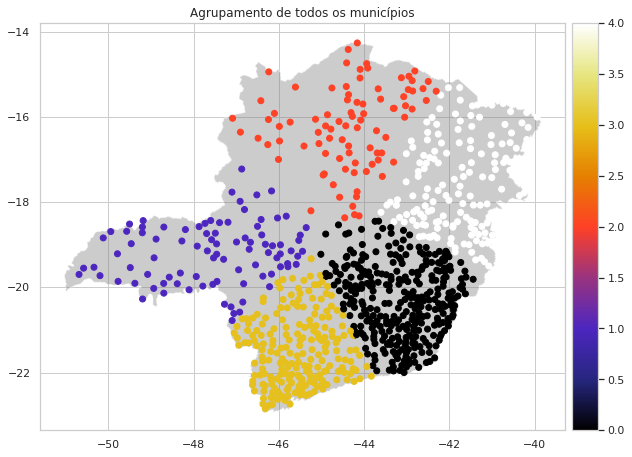

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style= "whitegrid", palette= "pastel", color_codes=True)
fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.title('Agrupamento de todos os municípios')
divider = make_axes_locatable(ax)  # para alinhar a legenda ao mapa
cax = divider.append_axes("right", size="5%", pad=0.1) #para alinhar a legenda ao mapa
mapamg.plot(ax=ax, color = 'grey', figsize = (10,10), alpha = 0.4)
geo.plot(ax=ax, column = 'cluster_label', cmap='CMRmap', legend = True, cax = cax)
plt.show()

In [24]:
geo['cluster_label'].value_counts()

0    321
3    207
4    146
1     91
2     88
Name: cluster_label, dtype: int64

In [25]:
geo.to_excel('/content/drive/My Drive/Tabelas Finais CAMG /Academias/todos_municipios.xlsx')

## Academia sem Quantidades



In [ ]:
academia = X[X['Quantidade'] > 0]

In [ ]:
len(academia)

In [ ]:
academia = academia[['codigo_ibge', 'municipio','latitude', 'longitude']]

In [ ]:
academia.head()

In [ ]:
# Para as academias
kmeans = KMeans(n_clusters = 5, init ='k-means++', n_init= 1000, max_iter = 10000)
kmeans.fit(academia[academia.columns[2:4]]) # Compute k-means clustering.
academia['cluster_label'] = kmeans.fit_predict(academia[academia.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(academia[academia.columns[2:4]]) # Labels of each point


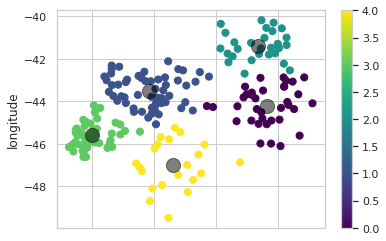

In [31]:
academia.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [32]:
geo_academia = gpd.GeoDataFrame(
    academia, geometry=gpd.points_from_xy(academia.longitude, academia.latitude))

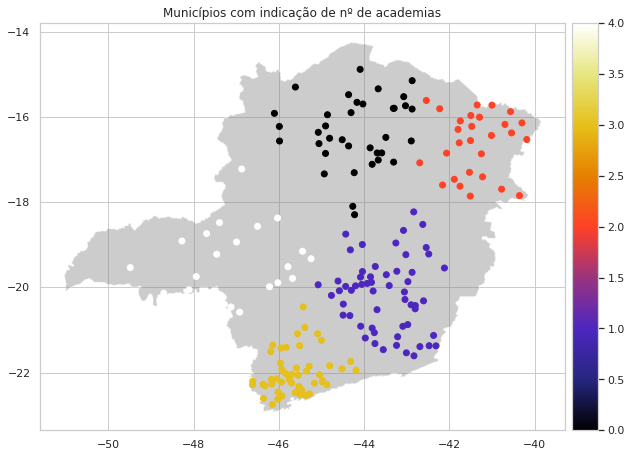

In [33]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style= "whitegrid", palette= "pastel", color_codes=True)

fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.title('Municípios com indicação de nº de academias')
divider = make_axes_locatable(ax)  # para alinhar a legenda ao mapa
cax = divider.append_axes("right", size="5%", pad=0.1) #para alinhar a legenda ao mapa
mapamg.plot(ax=ax, color = 'grey', figsize = (10,10), alpha = 0.4)
geo_academia.plot(ax=ax, column = 'cluster_label', cmap='CMRmap', legend = True, cax = cax)
plt.show()

In [34]:
geo_academia.to_excel('/content/drive/My Drive/Tabelas Finais CAMG /Academias/clustering_academias_apenas_localizacao.xlsx')

## Academia com Quantidades

In [42]:
academia_qtde = X[X['Quantidade'] >0]

In [43]:
len(academia)

191

In [44]:
academia_qtde = academia_qtde[['codigo_ibge', 'municipio', 'Quantidade', 'latitude', 'longitude']]

In [45]:
X = academia_qtde.copy()

In [46]:
X.head()

,codigo_ibge,municipio,Quantidade,latitude,longitude
0,3100104,ABADIA DOS DOURADOS,1.0,-18.4831,-47.3916
1,3100203,ABAETE,2.0,-19.1551,-45.4444
2,3100500,ACUCENA,1.0,-19.0671,-42.5419
3,3100708,AGUA COMPRIDA,1.0,-20.0576,-48.1069
4,3100807,AGUANIL,2.0,-20.9439,-45.3915


In [47]:
X.columns[1:4]

Index(['municipio', 'Quantidade', 'latitude'], dtype='object')

In [48]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', n_init= 1000, max_iter = 10000)

kmeans.fit(X[['Quantidade']]) # Compute k-means clustering.
academia_qtde['cluster_label'] = kmeans.fit_predict(academia_qtde[academia_qtde['Quantidade']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(academia_qtde[academia_qtde['Quantidade']]) # Labels of each point

KeyError: ignored

In [ ]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', n_init= 1000, max_iter = 10000)
kmeans.fit(X[X.columns[1:4]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:4]]) # Labels of each point


In [ ]:
geo_qtde = gpd.GeoDataFrame(
    X, geometry=gpd.points_from_xy(X.longitude, X.latitude))

In [ ]:
geo_qtde['cluster_label'].value_counts()

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style= "whitegrid", palette= "pastel", color_codes=True)
fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.title('Distribuição dos municípios por proximidade geográfica')
divider = make_axes_locatable(ax)  # para alinhar a legenda ao mapa
cax = divider.append_axes("right", size="5%", pad=0.1) #para alinhar a legenda ao mapa
mapamg.plot(ax=ax, color = 'grey', figsize = (10,10), alpha = 0.4)
geo_qtde.plot(ax=ax, column = 'cluster_label', cmap='CMRmap', legend = True, cax = cax)
plt.show()

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style= "whitegrid", palette= "pastel", color_codes=True)
fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.title('Distribuição dos municípios por quantidade de academias')
divider = make_axes_locatable(ax)  # para alinhar a legenda ao mapa
cax = divider.append_axes("right", size="5%", pad=0.1) #para alinhar a legenda ao mapa
mapamg.plot(ax=ax, color = 'grey', figsize = (10,10), alpha = 0.4)
geo_qtde.plot(ax=ax, column = 'Quantidade', cmap='CMRmap', legend = True, cax = cax)
plt.show()

In [ ]:
geo_qtde['Quantidade'].value_counts()

In [ ]:
geo_qtde.to_excel('/content/drive/My Drive/Tabelas Finais CAMG /Academias/municipios p quantidade academia.xlsx')

## 13/05 Para todos os municípios - 4 ou 6 lotes

4 Lotes

In [49]:
padrao = padrao[['codigo_ibge', 'latitude', 'longitude']]

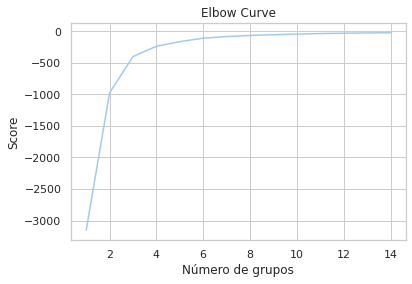

In [50]:
K_clusters = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = padrao[['latitude']]
X_axis = padrao[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] # Visualize
plt.plot(K_clusters, score)
plt.xlabel('Número de grupos')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [51]:
cluster4 = padrao
cluster4 = cluster4[['codigo_ibge', 'municipio', 'latitude', 'longitude']]

KeyError: ignored

In [ ]:
cluster4.head()

In [ ]:
kmeans = KMeans(n_clusters = 4, init ='k-means++', n_init= 1000, max_iter = 10000)
kmeans.fit(cluster4[cluster4.columns[2:4]]) # Compute k-means clustering.
cluster4['cluster_label'] = kmeans.fit_predict(cluster4[cluster4.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(cluster4[cluster4.columns[2:4]]) # Labels of each point


In [ ]:
geo_4 = gpd.GeoDataFrame(
    cluster4, geometry=gpd.points_from_xy(cluster4.longitude,cluster4.latitude))

In [ ]:
geo_4.to_excel('/content/drive/My Drive/Tabelas Finais CAMG /Academias/4 grupos.xlsx')

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style= "whitegrid", palette= "pastel", color_codes=True)
fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.title('Distribuição dos municípios por proximidade geográfica')
divider = make_axes_locatable(ax)  # para alinhar a legenda ao mapa
cax = divider.append_axes("right", size="5%", pad=0.1) #para alinhar a legenda ao mapa
mapamg.plot(ax=ax, color = 'grey', figsize = (10,10), alpha = 0.4)
geo_4.plot(ax=ax, column = 'cluster_label', cmap='CMRmap', legend = True, cax = cax)
plt.show()

In [ ]:
geo_4['cluster_label'].value_counts()

5 Lotes

In [ ]:
cluster5 = padrao

In [ ]:
cluster5 = cluster5[['codigo_ibge', 'municipio', 'latitude', 'longitude']]

In [ ]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', n_init= 1000, max_iter = 10000)
kmeans.fit(cluster5[cluster5.columns[2:4]]) # Compute k-means clustering.
cluster5['cluster_label'] = kmeans.fit_predict(cluster5[cluster5.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(cluster5[cluster5.columns[2:4]]) # Labels of each point


In [ ]:
geo_5 = gpd.GeoDataFrame(
    cluster5, geometry=gpd.points_from_xy(cluster5.longitude,cluster5.latitude))

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style= "whitegrid", palette= "pastel", color_codes=True)
fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.title('Distribuição dos municípios por proximidade geográfica')
divider = make_axes_locatable(ax)  # para alinhar a legenda ao mapa
cax = divider.append_axes("right", size="5%", pad=0.1) #para alinhar a legenda ao mapa
mapamg.plot(ax=ax, color = 'grey', figsize = (10,10), alpha = 0.4)
geo_5.plot(ax=ax, column = 'cluster_label', cmap='CMRmap', legend = True, cax = cax)
plt.show()

In [ ]:
geo_4['cluster_label'].value_counts()

6 Lotes


In [ ]:
cluster6 = padrao

cluster6 = padrao[['codigo_ibge', 'municipio', 'latitude', 'longitude']]

In [ ]:
cluster6.head()

In [ ]:
kmeans = KMeans(n_clusters = 6, init ='k-means++', n_init= 1000, max_iter = 10000)
kmeans.fit(cluster6[cluster6.columns[2:4]]) # Compute k-means clustering.
cluster6['cluster_label'] = kmeans.fit_predict(cluster6[cluster6.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(cluster6[cluster6.columns[2:4]]) # Labels of each point


In [ ]:
geo_6 = gpd.GeoDataFrame(
    cluster6, geometry=gpd.points_from_xy(cluster6.longitude,cluster6.latitude))

In [ ]:
geo_6.to_excel('/content/drive/My Drive/Tabelas Finais CAMG /Academias/6 grupos
.xlsx')

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style= "whitegrid", palette= "pastel", color_codes=True)
fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.title('Distribuição dos municípios por proximidade geográfica - 6 grupos')
divider = make_axes_locatable(ax)  # para alinhar a legenda ao mapa
cax = divider.append_axes("right", size="5%", pad=0.1) #para alinhar a legenda ao mapa
mapamg.plot(ax=ax, color = 'grey', figsize = (10,10), alpha = 0.4)
geo_6.plot(ax=ax, column = 'cluster_label', cmap='CMRmap', legend = True, cax = cax)
plt.show()

In [ ]:
geo_6['cluster_label'].value_counts()

In [ ]:
geo_6.head()

In [ ]:
geo_6.to_excel('/content/drive/My Drive/Tabelas Finais CAMG /Academias/6 grupos.xlsx')

5 grupos modificado

In [ ]:
geo_5_modificado = geo_6

In [ ]:
geo_5_modificado.head()

In [ ]:
geo_5_modificado['cluster_label'].value_counts()

In [ ]:
x = geo_5_modificado['cluster_label'] == 4

In [ ]:
geo_5_modificado.loc[x, 'cluster_label'] = 2

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set(style= "whitegrid", palette= "pastel", color_codes=True)
fig, ax = plt.subplots(1,1, figsize = (10, 10))
plt.title('Distribuição dos municípios por proximidade geográfica - 5 grupos')
divider = make_axes_locatable(ax)  # para alinhar a legenda ao mapa
cax = divider.append_axes("right", size="5%", pad=0.1) #para alinhar a legenda ao mapa
mapamg.plot(ax=ax, color = 'grey', figsize = (10,10), alpha = 0.4)
geo_5_modificado.plot(ax=ax, column = 'cluster_label', cmap='CMRmap', legend = True, cax = cax)
plt.show()

In [ ]:
geo_6['cluster_label'].dtypes

In [ ]:
geo_5_modificado.to_excel('/content/drive/My Drive/Tabelas Finais CAMG /Academias/5 grupos modificado.xlsx')

In [ ]:
geo_6['cluster_label'].describe()